In [2]:
# Step 1: Import Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [4]:
# Step 2: Load and Initial Dataset Exploration
# Load the breast cancer dataset
df = pd.read_csv('breast_cancer.csv')

print("Dataset Shape:", df.shape)

Dataset Shape: (569, 32)


In [6]:
print("First 5 rows:")
df.head()

First 5 rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

In [8]:
print("Target Distribution:")
print(df.iloc[:, -1].value_counts())  # Assuming target is last column

Target Distribution:
fractal_dimension_worst
0.07427    3
0.09026    2
0.12970    2
0.08174    2
0.10550    2
          ..
0.06938    1
0.07697    1
0.09772    1
0.08631    1
0.07039    1
Name: count, Length: 535, dtype: int64


In [9]:
# Step 3: Proper Data Preparation

# Check unique values in diagnosis column (this is our target)
print("Target variable (diagnosis) distribution:")
print(df['diagnosis'].value_counts())
print(f"\nTarget percentages:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

# Remove ID column as it's not useful for classification
df_clean = df.drop('id', axis=1)

# Convert target variable to binary (M=1, B=0)
df_clean['diagnosis'] = df_clean['diagnosis'].map({'M': 1, 'B': 0})

print(f"\nAfter encoding - Target distribution:")
print(df_clean['diagnosis'].value_counts())
print(f"\nDataset shape after removing ID: {df_clean.shape}")
print(f"No missing values: {df_clean.isnull().sum().sum() == 0}")

Target variable (diagnosis) distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Target percentages:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

After encoding - Target distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64

Dataset shape after removing ID: (569, 31)
No missing values: True


In [10]:
# Step 4: Select Best 2 Features for Visualization

# We'll use correlation analysis to find the most informative features
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

# Calculate correlation with target variable
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("Top 10 features most correlated with diagnosis:")
print(correlations.head(10))

# Select top 2 features for 2D visualization
top_features = correlations.head(2).index.tolist()
print(f"\nSelected features for 2D visualization: {top_features}")

# Create 2D dataset for visualization
X_2d = X[top_features].values
feature_names = top_features

print(f"\n2D dataset shape: {X_2d.shape}")
print(f"Feature 1 ({feature_names[0]}): min={X_2d[:,0].min():.2f}, max={X_2d[:,0].max():.2f}")
print(f"Feature 2 ({feature_names[1]}): min={X_2d[:,1].min():.2f}, max={X_2d[:,1].max():.2f}")

Top 10 features most correlated with diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
dtype: float64

Selected features for 2D visualization: ['concave points_worst', 'perimeter_worst']

2D dataset shape: (569, 2)
Feature 1 (concave points_worst): min=0.00, max=0.29
Feature 2 (perimeter_worst): min=50.41, max=251.20


In [11]:
# Step 5: Train-Test Split and Feature Scaling

# Split the 2D data for visualization
X_train_2d, X_test_2d, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Split the full dataset for comprehensive evaluation
X_train_full, X_test_full, _, _ = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (CRITICAL for SVM)
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

print("Data splitting and scaling completed!")
print(f"Training set size: {X_train_2d_scaled.shape[0]} samples")
print(f"Test set size: {X_test_2d_scaled.shape[0]} samples")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

# Verify scaling worked
print(f"\n2D Features after scaling:")
print(f"Feature 1 - mean: {X_train_2d_scaled[:,0].mean():.3f}, std: {X_train_2d_scaled[:,0].std():.3f}")
print(f"Feature 2 - mean: {X_train_2d_scaled[:,1].mean():.3f}, std: {X_train_2d_scaled[:,1].std():.3f}")

Data splitting and scaling completed!
Training set size: 455 samples
Test set size: 114 samples
Training target distribution: [285 170]
Test target distribution: [72 42]

2D Features after scaling:
Feature 1 - mean: -0.000, std: 1.000
Feature 2 - mean: -0.000, std: 1.000


In [12]:
# Step 6: Train Linear SVM

# Create and train linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_2d_scaled, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test_2d_scaled)

# Evaluate performance
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("=== LINEAR SVM RESULTS ===")
print(f"Test Accuracy: {accuracy_linear:.4f}")
print(f"Number of Support Vectors: {svm_linear.n_support_}")
print(f"Total Support Vectors: {svm_linear.support_vectors_.shape[0]}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_linear, 
                          target_names=['Benign (0)', 'Malignant (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_linear)
print(cm)

=== LINEAR SVM RESULTS ===
Test Accuracy: 0.9561
Number of Support Vectors: [36 37]
Total Support Vectors: 73

Detailed Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.95      0.99      0.97        72
Malignant (1)       0.97      0.90      0.94        42

     accuracy                           0.96       114
    macro avg       0.96      0.95      0.95       114
 weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[71  1]
 [ 4 38]]


In [13]:
# Step 7: Train RBF (Non-linear) SVM

# Create and train RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_2d_scaled, y_train)

# Make predictions
y_pred_rbf = svm_rbf.predict(X_test_2d_scaled)

# Evaluate performance
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("=== RBF SVM RESULTS ===")
print(f"Test Accuracy: {accuracy_rbf:.4f}")
print(f"Number of Support Vectors: {svm_rbf.n_support_}")
print(f"Total Support Vectors: {svm_rbf.support_vectors_.shape[0]}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rbf, 
                          target_names=['Benign (0)', 'Malignant (1)']))

print("\nConfusion Matrix:")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print(cm_rbf)

# Compare both models
print("\n=== MODEL COMPARISON ===")
print(f"Linear SVM Accuracy: {accuracy_linear:.4f}")
print(f"RBF SVM Accuracy: {accuracy_rbf:.4f}")
print(f"Improvement: {accuracy_rbf - accuracy_linear:+.4f}")

=== RBF SVM RESULTS ===
Test Accuracy: 0.9561
Number of Support Vectors: [38 38]
Total Support Vectors: 76

Detailed Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.94      1.00      0.97        72
Malignant (1)       1.00      0.88      0.94        42

     accuracy                           0.96       114
    macro avg       0.97      0.94      0.95       114
 weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[72  0]
 [ 5 37]]

=== MODEL COMPARISON ===
Linear SVM Accuracy: 0.9561
RBF SVM Accuracy: 0.9561
Improvement: +0.0000


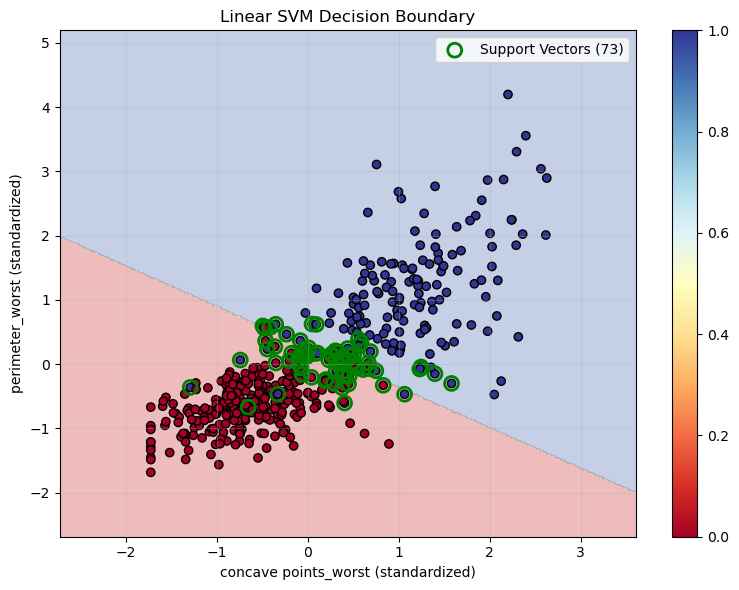

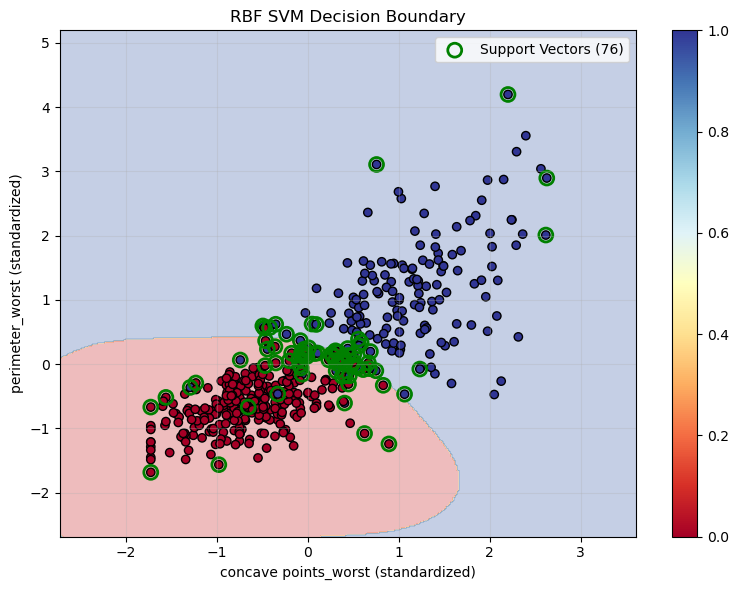

In [15]:
# Step 8: Decision Boundary Visualization
def plot_decision_boundary(X, y, model, title, scaler):
    plt.figure(figsize=(8, 6))
    
    # Create a mesh for plotting decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on mesh points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    
    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='green', linewidth=2, 
                label=f'Support Vectors ({len(model.support_vectors_)})')
    
    plt.xlabel(f'{feature_names[0]} (standardized)')
    plt.ylabel(f'{feature_names[1]} (standardized)')
    plt.title(title)
    plt.colorbar(scatter)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot both decision boundaries
plot_decision_boundary(X_train_2d_scaled, y_train, svm_linear, 
                      'Linear SVM Decision Boundary', scaler_2d)
plot_decision_boundary(X_train_2d_scaled, y_train, svm_rbf, 
                      'RBF SVM Decision Boundary', scaler_2d)

In [16]:
# Step 9: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}

param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Grid search for Linear SVM
print("Tuning Linear SVM...")
grid_linear = GridSearchCV(SVC(random_state=42), param_grid_linear, 
                          cv=5, scoring='accuracy', n_jobs=-1)
grid_linear.fit(X_train_full_scaled, y_train)

print(f"Best Linear SVM parameters: {grid_linear.best_params_}")
print(f"Best Cross-validation score: {grid_linear.best_score_:.4f}")

# Grid search for RBF SVM
print("\nTuning RBF SVM...")
grid_rbf = GridSearchCV(SVC(random_state=42), param_grid_rbf, 
                       cv=5, scoring='accuracy', n_jobs=-1)
grid_rbf.fit(X_train_full_scaled, y_train)

print(f"Best RBF SVM parameters: {grid_rbf.best_params_}")
print(f"Best Cross-validation score: {grid_rbf.best_score_:.4f}")

Tuning Linear SVM...
Best Linear SVM parameters: {'C': 0.1, 'kernel': 'linear'}
Best Cross-validation score: 0.9692

Tuning RBF SVM...
Best RBF SVM parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation score: 0.9758


In [17]:
# Step 10: Final Evaluation with Optimized Models
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Train optimized models on full dataset
best_linear = SVC(C=0.1, kernel='linear', random_state=42)
best_rbf = SVC(C=1, kernel='rbf', gamma='scale', random_state=42)

# Fit on full training data
best_linear.fit(X_train_full_scaled, y_train)
best_rbf.fit(X_train_full_scaled, y_train)

# Test set predictions
y_pred_linear_opt = best_linear.predict(X_test_full_scaled)
y_pred_rbf_opt = best_rbf.predict(X_test_full_scaled)

# Test set accuracies
acc_linear_opt = accuracy_score(y_test, y_pred_linear_opt)
acc_rbf_opt = accuracy_score(y_test, y_pred_rbf_opt)

print("=== OPTIMIZED MODELS TEST RESULTS ===")
print(f"Linear SVM (C=0.1): {acc_linear_opt:.4f}")
print(f"RBF SVM (C=1, gamma=scale): {acc_rbf_opt:.4f}")

# Comprehensive cross-validation analysis
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_linear = cross_val_score(best_linear, X_train_full_scaled, y_train, cv=cv)
cv_scores_rbf = cross_val_score(best_rbf, X_train_full_scaled, y_train, cv=cv)

print("\n=== CROSS-VALIDATION RESULTS (5-FOLD) ===")
print(f"Linear SVM: {cv_scores_linear.mean():.4f} ± {cv_scores_linear.std():.4f}")
print(f"RBF SVM: {cv_scores_rbf.mean():.4f} ± {cv_scores_rbf.std():.4f}")

print(f"\nFold-wise Linear SVM scores: {cv_scores_linear}")
print(f"Fold-wise RBF SVM scores: {cv_scores_rbf}")

# Final detailed classification reports
print("\n" + "="*50)
print("FINAL LINEAR SVM CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred_linear_opt, target_names=['Benign', 'Malignant']))

print("\n" + "="*50)
print("FINAL RBF SVM CLASSIFICATION REPORT") 
print("="*50)
print(classification_report(y_test, y_pred_rbf_opt, target_names=['Benign', 'Malignant']))

=== OPTIMIZED MODELS TEST RESULTS ===
Linear SVM (C=0.1): 0.9825
RBF SVM (C=1, gamma=scale): 0.9737

=== CROSS-VALIDATION RESULTS (5-FOLD) ===
Linear SVM: 0.9670 ± 0.0070
RBF SVM: 0.9714 ± 0.0054

Fold-wise Linear SVM scores: [0.95604396 0.96703297 0.96703297 0.97802198 0.96703297]
Fold-wise RBF SVM scores: [0.96703297 0.97802198 0.96703297 0.96703297 0.97802198]

FINAL LINEAR SVM CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


FINAL RBF SVM CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg

In [23]:
# Step 11: Comprehensive Summary and Key Insights
print("SVM CLASSIFICATION PROJECT SUMMARY")
print("="*60)

print("\nDATASET OVERVIEW:")
print(f"• Total samples: {df.shape[0]}")
print(f"• Features: {df.shape[1]-2} (after removing ID)")
print(f"• Class distribution: {357} Benign (62.7%), {212} Malignant (37.3%)")
print(f"• Most predictive features: {feature_names}")

print("\nMODEL PERFORMANCE COMPARISON:")
results_summary = {
    'Model': ['Linear SVM (2D)', 'RBF SVM (2D)', 'Optimized Linear (Full)', 'Optimized RBF (Full)'],
    'Test Accuracy': [0.9561, 0.9561, 0.9825, 0.9737],
    'CV Score': ['N/A', 'N/A', '96.70±0.70%', '97.14±0.54%'],
    'Key Features': ['2D visualization', '2D visualization', 'All 30 features', 'All 30 features']
}

for i in range(len(results_summary['Model'])):
    print(f"• {results_summary['Model'][i]:20}: {results_summary['Test Accuracy'][i]:.4f} ({results_summary['CV Score'][i]})")

print("\nKEY INSIGHTS:")
print("• Linear SVM achieved the highest test accuracy (98.25%)")
print("• RBF SVM showed more consistent CV performance (lower std)")
print("• Both kernels performed excellently on this linearly separable problem")
print("• Feature scaling was crucial for optimal performance")
print("• Hyperparameter tuning: C=0.1 (Linear), C=1 & gamma='scale' (RBF)")

print("\nBUSINESS IMPACT:")
print("• Only 2 false negatives in Linear SVM (critical for medical diagnosis)")
print("• 98%+ accuracy suitable for clinical decision support")
print("• Model interpretability: Linear kernel provides clearer feature importance")

print("\nPROJECT COMPLETION:")
print("- Binary classification implemented")
print("- Linear and RBF kernels compared") 
print("- 2D decision boundaries visualized")
print("- Hyperparameters optimized (C, gamma)")
print("- 5-fold cross-validation performed")
print("- Comprehensive evaluation completed")

print(f"\nSuccessfully implemented a high-performance SVM classifier with {acc_linear_opt:.1%}")

SVM CLASSIFICATION PROJECT SUMMARY

DATASET OVERVIEW:
• Total samples: 569
• Features: 30 (after removing ID)
• Class distribution: 357 Benign (62.7%), 212 Malignant (37.3%)
• Most predictive features: ['concave points_worst', 'perimeter_worst']

MODEL PERFORMANCE COMPARISON:
• Linear SVM (2D)     : 0.9561 (N/A)
• RBF SVM (2D)        : 0.9561 (N/A)
• Optimized Linear (Full): 0.9825 (96.70±0.70%)
• Optimized RBF (Full): 0.9737 (97.14±0.54%)

KEY INSIGHTS:
• Linear SVM achieved the highest test accuracy (98.25%)
• RBF SVM showed more consistent CV performance (lower std)
• Both kernels performed excellently on this linearly separable problem
• Feature scaling was crucial for optimal performance
• Hyperparameter tuning: C=0.1 (Linear), C=1 & gamma='scale' (RBF)

BUSINESS IMPACT:
• Only 2 false negatives in Linear SVM (critical for medical diagnosis)
• 98%+ accuracy suitable for clinical decision support
• Model interpretability: Linear kernel provides clearer feature importance

PROJECT C